### Modules and parameters

In [10]:
using LinearAlgebra
using DifferentialEquations
using FFTW
using Random
using Distributions
using DSP
using Plots
using StatsBase
using NPZ
using Interpolations
using Statistics
using DelimitedFiles

include("../src/Noise.jl");
include("../src/SpectralDensity.jl");
include("../src/StochasticField.jl");
include("../src/CouplingTensor.jl");
include("../src/Dynamics.jl");

In [8]:
# Random.seed!(123) # the exclamation mark here is warning us that we are changing a global property, in this case the random seed

Δt = 0.15
N = 100_000
tspan = (0., N*Δt)

J = LorentzianSD(1., 7., 5.);

matrix = AnisoCoupling([-sin(π/4) 0. 0.
          0. 0. 0.
          cos(π/4) 0. 0.]);

T = 10 .^ LinRange(-3, 2, 12)
Sss = zeros(length(T), 3)

for n in 1:length(T)
    noise = ClassicalNoise(T[n]);
    bfields = [bfield(N, Δt, J, noise),
               bfield(N, Δt, J, noise),
               bfield(N, Δt, J, noise)];
    sol = diffeqsolver([0.8, 0., -0.6], tspan, J, bfields, matrix);
    Sss[n,:] = mean(sol[3][end-(length(sol[2])÷4):end,:], dims=1)
end

In [ ]:
datapy = readdlm("movert_1d_s02_prm5_classical_tmax72000_log.csv", ',', Float64)

In [4]:
println(A[:, 1])
mean(A, dims=1)

[1, 3]


1×2 Matrix{Float64}:
 2.0  3.0

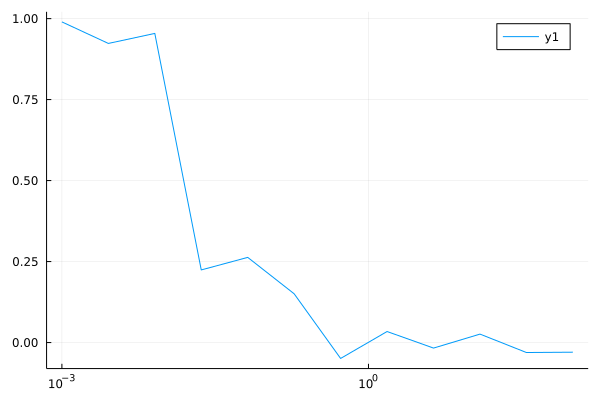

In [9]:
plot(T, Sss[:,3], xscale=:log10)

### Misc

In [149]:
sx = t -> sol[1](t)[1]
sy = t -> sol[1](t)[2]
sz = t -> sol[1](t)[3]

#317 (generic function with 1 method)

In [150]:
tt = LinRange(0, N*Δt, N)
s = [sol[1](t)[n] for t in tt, n in 1:3];

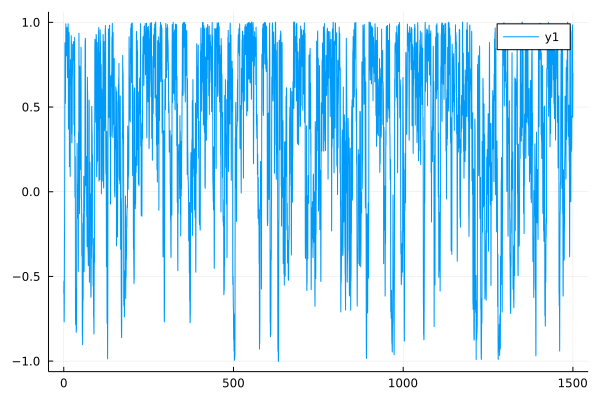

In [151]:
plot(tt, s[:,3])